In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import matplotlib.pyplot as plt

# Clustering demo for k-means with computer-generated appreciations data

num_clusters = 4

# read data (replace with your own path)
df = pd.read_csv('C:\\Users\\kopuj\\Downloads\\appreciation_v3.csv', sep=';')
df.head(5)



,ID,Sports and exercise,Bars and clubs,Literature,Music,Family,Nature and wildlife,Gardening,Home decoration,Travel,Handicraft,Fashion and clothing,Monthly income,Gender,Age
0,1,4,4,5,7,8,9,6,9,5,6,9,2353,M,47
1,2,6,5,6,6,10,8,10,8,5,5,10,2954,M,63
2,3,5,6,7,5,6,4,5,6,6,4,5,3253,M,44
3,4,2,4,2,4,6,3,1,3,1,3,6,1484,M,31
4,5,10,8,3,7,10,5,7,9,9,7,5,2246,M,37
5,6,5,7,3,4,2,1,2,2,10,0,10,1978,F,23
6,7,7,9,2,7,4,4,2,3,10,0,6,2485,F,50
7,8,3,4,1,4,3,3,1,1,5,0,10,2822,M,25
8,9,7,6,6,9,9,7,10,10,7,5,3,3799,F,46
9,10,7,9,2,9,5,5,5,4,10,4,10,2185,M,34


In [5]:
# re-encode gender column
df['Gender'].replace(['M','F'], [1,2], inplace=True)

# drop ID
df.drop(columns=['ID'], inplace=True)

df.head(10)

C:\Users\kopuj\AppData\Local\Temp\ipykernel_9256\2961582771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(['M','F'], [1,2], inplace=True)
C:\Users\kopuj\AppData\Local\Temp\ipykernel_9256\2961582771.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace(['

,Sports and exercise,Bars and clubs,Literature,Music,Family,Nature and wildlife,Gardening,Home decoration,Travel,Handicraft,Fashion and clothing,Monthly income,Gender,Age
0,4,4,5,7,8,9,6,9,5,6,9,2353,1,47
1,6,5,6,6,10,8,10,8,5,5,10,2954,1,63
2,5,6,7,5,6,4,5,6,6,4,5,3253,1,44
3,2,4,2,4,6,3,1,3,1,3,6,1484,1,31
4,10,8,3,7,10,5,7,9,9,7,5,2246,1,37
5,5,7,3,4,2,1,2,2,10,0,10,1978,2,23
6,7,9,2,7,4,4,2,3,10,0,6,2485,2,50
7,3,4,1,4,3,3,1,1,5,0,10,2822,1,25
8,7,6,6,9,9,7,10,10,7,5,3,3799,2,46
9,7,9,2,9,5,5,5,4,10,4,10,2185,1,34


In [6]:
df.describe()

,Sports and exercise,Bars and clubs,Literature,Music,Family,Nature and wildlife,Gardening,Home decoration,Travel,Handicraft,Fashion and clothing,Monthly income,Gender,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,5.966000,5.931000,4.801000,6.183000,5.878000,4.849000,5.905000,5.89100,6.021000,3.943000,5.776000,3022.60200,1.483000,44.928000
std,2.451296,2.521626,2.445686,2.508746,2.520609,2.166308,2.453976,2.44481,2.538307,2.489166,2.611253,1004.48824,0.499961,12.833843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,264.00000,1.000000,18.000000
25%,4.000000,4.000000,3.000000,4.750000,4.000000,3.000000,4.000000,4.00000,4.000000,2.000000,4.000000,2329.00000,1.000000,35.000000
50%,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.00000,6.000000,4.000000,6.000000,3049.50000,1.000000,46.000000
75%,8.000000,8.000000,7.000000,8.000000,8.000000,6.000000,8.000000,8.00000,8.000000,6.000000,8.000000,3743.25000,2.000000,55.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,6057.00000,2.000000,78.000000


In [7]:
# save column headings into a list as they will be lost
colnames = df.columns.values

# normalize all variables to mean=0, sd=1
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.802426,-0.766159,0.081408,0.325824,0.842281,1.917122,0.038732,1.272310,-0.402438,0.826795,1.235274,-0.666944,-0.966559,0.161529
1,0.013877,-0.369391,0.490496,-0.072981,1.636137,1.455276,1.669556,0.863075,-0.402438,0.424853,1.618424,-0.068330,-0.966559,1.408856
2,-0.394274,0.027377,0.899584,-0.471786,0.048425,-0.392107,-0.368974,0.044607,-0.008277,0.022911,-0.297324,0.229483,-0.966559,-0.072345
3,-1.618729,-0.766159,-1.145855,-0.870591,0.048425,-0.853953,-1.999797,-1.183097,-1.979080,-0.379031,0.085825,-1.532494,-0.966559,-1.085799
4,1.646483,0.820913,-0.736767,0.325824,1.636137,0.069739,0.446438,1.272310,1.174204,1.228737,-0.297324,-0.773519,-0.966559,-0.618051


In [8]:
kmeans = cluster.KMeans(n_clusters=num_clusters)
kmeans.fit(df_scaled)

centroids = kmeans.cluster_centers_
print(centroids)


[[ 0.22096884  0.71927775 -0.72064547 -0.19085473 -0.40716214 -0.40120748
  -0.64010829 -0.67709747  0.63830122 -0.41269149  0.58599605 -0.41413849
  -0.30607844 -0.66528643]
 [ 0.60179631  0.14607765  0.59475136  0.52025496  0.87746606  0.84630489
   0.95804673  0.87667872  0.07361193  0.92922871 -0.21135419  0.19575625
  -0.0685327   0.16260867]
 [-1.18546054 -0.79464482 -0.93396846 -1.02602307 -0.48488323 -0.46079183
  -0.80386012 -0.85570914 -0.65712623 -0.59958413  0.67921604 -0.7958146
   0.35728349 -0.67641934]
 [-0.12838314 -0.1817082   0.47182423  0.21164301 -0.57908343 -0.55691511
  -0.24547786 -0.05048526 -0.11622175 -0.55915472 -0.72657868  0.69952679
   0.07138567  0.86412111]]


In [9]:
# create a pandas data frame with columns
centroids_df = pd.DataFrame(centroids, columns=colnames)
print(centroids_df)

   Sports and exercise  Bars and clubs  Literature     Music    Family  \
0             0.220969        0.719278   -0.720645 -0.190855 -0.407162   
1             0.601796        0.146078    0.594751  0.520255  0.877466   
2            -1.185461       -0.794645   -0.933968 -1.026023 -0.484883   
3            -0.128383       -0.181708    0.471824  0.211643 -0.579083   

   Nature and wildlife  Gardening  Home decoration    Travel  Handicraft  \
0            -0.401207  -0.640108        -0.677097  0.638301   -0.412691   
1             0.846305   0.958047         0.876679  0.073612    0.929229   
2            -0.460792  -0.803860        -0.855709 -0.657126   -0.599584   
3            -0.556915  -0.245478        -0.050485 -0.116222   -0.559155   

   Fashion and clothing  Monthly income    Gender       Age  
0              0.585996       -0.414138 -0.306078 -0.665286  
1             -0.211354        0.195756 -0.068533  0.162609  
2              0.679216       -0.795815  0.357283 -0.676419  


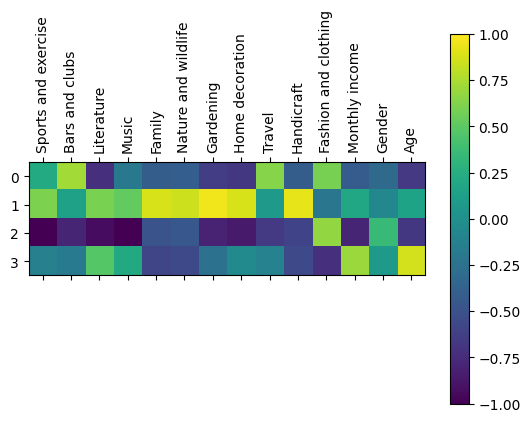

In [10]:
# visualize with matplotlib
fig=plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(centroids_df, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(colnames),1)
ax.set_xticks(ticks)
#ax.set_yticks(ticks)
ax.set_xticklabels(colnames)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
#ax.set_yticklabels(cnames)
plt.show()

